In [370]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [371]:
#import the csv files needed for cleaning and organizing. Two census csv's covering the population by age by
#by state and the population by ethnicity by state
#the OPTN data is combined age, ethnicity by state

census_age_csv = "csv/all-states-age_ACSDT1Y2021.B01001A-2023-05-23T032718.csv"
census_eth_csv = "csv/all-states-ethnicities_DECENNIALPL2020.P2-2023-05-23T032847.csv"
optn_age_eth_csv = "csv/May-22-Waitlist_Candidate_State_of_Residence_by_Age_Ethnicity_Waiting_Time.csv"

#create dataframes from each csv
census_age_df = pd.read_csv(census_age_csv)
census_eth_df = pd.read_csv(census_eth_csv)
optn_age_eth_df = pd.read_csv(optn_age_eth_csv)

In [372]:
census_age_df.head()

,Label (Grouping),United States!!Estimate,United States!!Margin of Error,Alabama!!Estimate,Alabama!!Margin of Error,Alaska!!Estimate,Alaska!!Margin of Error,Arizona!!Estimate,Arizona!!Margin of Error,Arkansas!!Estimate,...,Virginia!!Estimate,Virginia!!Margin of Error,Washington!!Estimate,Washington!!Margin of Error,West Virginia!!Estimate,West Virginia!!Margin of Error,Wisconsin!!Estimate,Wisconsin!!Margin of Error,Puerto Rico!!Estimate,Puerto Rico!!Margin of Error
0,Total:,"202,981,791","±124,967","3,281,881","±9,108","435,004","±3,285","4,241,669","±22,497","2,115,847",...,"5,251,112","±13,199","5,139,448","±14,384","1,617,386","±4,044","4,732,002","±8,956","914,840","±20,303"
1,Male:,"100,721,875","±70,974","1,609,702","±5,390","229,752","±2,148","2,110,162","±13,742","1,045,395",...,"2,614,659","±8,980","2,582,532","±7,957","801,721","±4,027","2,367,865","±5,053","433,808","±11,289"
2,Under 5 years,"4,948,268","±16,515","83,827","±1,539","11,682",±880,"93,920","±3,464","55,670",...,"127,120","±3,507","119,060","±2,077","39,663","±1,850","112,263","±1,371","13,534","±2,116"
3,5 to 9 years,"5,370,610","±37,860","88,219","±3,229","11,086","±1,697","106,585","±4,272","60,165",...,"140,124","±5,054","132,699","±4,717","42,394","±3,029","117,559","±3,551","21,500","±2,781"
4,10 to 14 years,"5,870,506","±36,113","99,071","±3,419","13,932","±1,674","107,119","±4,310","68,477",...,"152,009","±5,545","141,560","±5,107","49,844","±3,270","139,406","±3,487","25,263","±3,244"


In [373]:
#drop columns with margin of error
census_age_df_drop = census_age_df[census_age_df.columns.drop(list(census_age_df.filter(regex='!!Margin of Error')))]
census_age_df_drop.head()

,Label (Grouping),United States!!Estimate,Alabama!!Estimate,Alaska!!Estimate,Arizona!!Estimate,Arkansas!!Estimate,California!!Estimate,Colorado!!Estimate,Connecticut!!Estimate,Delaware!!Estimate,...,South Dakota!!Estimate,Tennessee!!Estimate,Texas!!Estimate,Utah!!Estimate,Vermont!!Estimate,Virginia!!Estimate,Washington!!Estimate,West Virginia!!Estimate,Wisconsin!!Estimate,Puerto Rico!!Estimate
0,Total:,"202,981,791","3,281,881","435,004","4,241,669","2,115,847","15,443,776","4,101,383","2,354,580","609,759",...,"722,723","5,097,360","14,129,750","2,647,741","588,142","5,251,112","5,139,448","1,617,386","4,732,002","914,840"
1,Male:,"100,721,875","1,609,702","229,752","2,110,162","1,045,395","7,739,344","2,071,289","1,153,416","295,365",...,"366,175","2,506,559","7,033,907","1,337,725","292,003","2,614,659","2,582,532","801,721","2,367,865","433,808"
2,Under 5 years,"4,948,268","83,827","11,682","93,920","55,670","346,062","96,707","46,793","12,475",...,"19,668","130,599","393,491","89,397","12,216","127,120","119,060","39,663","112,263","13,534"
3,5 to 9 years,"5,370,610","88,219","11,086","106,585","60,165","355,229","103,515","52,981","13,802",...,"22,298","143,343","445,560","103,667","14,330","140,124","132,699","42,394","117,559","21,500"
4,10 to 14 years,"5,870,506","99,071","13,932","107,119","68,477","417,390","123,335","59,907","14,668",...,"22,927","144,002","461,009","107,652","15,348","152,009","141,560","49,844","139,406","25,263"


In [374]:
#rename columns without the '!!Estimate'
census_age_df_drop.columns = census_age_df_drop.columns.str.replace('!!Estimate', '')
census_age_df_drop.columns

Index(['Label (Grouping)', 'United States', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Puerto Rico'],
      dtype='object')

In [375]:
#newly renamed column names
census_age_df_drop.head()

,Label (Grouping),United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Puerto Rico
0,Total:,"202,981,791","3,281,881","435,004","4,241,669","2,115,847","15,443,776","4,101,383","2,354,580","609,759",...,"722,723","5,097,360","14,129,750","2,647,741","588,142","5,251,112","5,139,448","1,617,386","4,732,002","914,840"
1,Male:,"100,721,875","1,609,702","229,752","2,110,162","1,045,395","7,739,344","2,071,289","1,153,416","295,365",...,"366,175","2,506,559","7,033,907","1,337,725","292,003","2,614,659","2,582,532","801,721","2,367,865","433,808"
2,Under 5 years,"4,948,268","83,827","11,682","93,920","55,670","346,062","96,707","46,793","12,475",...,"19,668","130,599","393,491","89,397","12,216","127,120","119,060","39,663","112,263","13,534"
3,5 to 9 years,"5,370,610","88,219","11,086","106,585","60,165","355,229","103,515","52,981","13,802",...,"22,298","143,343","445,560","103,667","14,330","140,124","132,699","42,394","117,559","21,500"
4,10 to 14 years,"5,870,506","99,071","13,932","107,119","68,477","417,390","123,335","59,907","14,668",...,"22,927","144,002","461,009","107,652","15,348","152,009","141,560","49,844","139,406","25,263"


In [376]:
#drop rows with separated male and female numbers. Use the index to drop certain rows
#number of rows to drop is 31
census_age_df_droprows = census_age_df_drop.iloc[31:]
census_age_df_droprows.head()

,Label (Grouping),United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Puerto Rico
31,Combined Male Female:,"202,981,791","3,281,881","435,004","4,241,669","2,115,847","15,443,776","4,101,383","2,354,580","609,759",...,"722,723","5,097,360","14,129,750","2,647,741","588,142","5,251,112","5,139,448","1,617,386","4,732,002","914,840"
32,Under 5 years,"9,672,813","163,127","22,352","188,036","107,652","689,499","188,838","90,781","25,306",...,"39,969","253,917","773,477","173,112","24,066","250,440","230,245","77,439","218,372","31,193"
33,0-5 years,"11,769,004","197,779","27,038","228,891","130,752","831,944","229,927","111,684","30,900",...,"48,789","308,798","946,327","213,595","29,312","305,129","281,544","94,398","265,397","39,408"
34,5 to 9 years,"10,480,954","173,262","23,429","204,273","115,501","712,226","205,444","104,517","27,969",...,"44,100","274,404","864,251","202,417","26,231","273,447","256,495","84,796","235,125","41,075"
35,6-10 Years,"10,669,038","177,870","23,884","206,082","118,845","729,665","210,661","106,814","28,179",...,"44,056","276,909","872,207","203,631","27,243","277,228","260,489","86,936","241,529","43,037"


In [377]:
#rename column "Label (Grouping)"
census_age_df_droprows = census_age_df_droprows.rename(columns={'Label (Grouping)': 'Age'})

census_age_df_droprows.head()

,Age,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Puerto Rico
31,Combined Male Female:,"202,981,791","3,281,881","435,004","4,241,669","2,115,847","15,443,776","4,101,383","2,354,580","609,759",...,"722,723","5,097,360","14,129,750","2,647,741","588,142","5,251,112","5,139,448","1,617,386","4,732,002","914,840"
32,Under 5 years,"9,672,813","163,127","22,352","188,036","107,652","689,499","188,838","90,781","25,306",...,"39,969","253,917","773,477","173,112","24,066","250,440","230,245","77,439","218,372","31,193"
33,0-5 years,"11,769,004","197,779","27,038","228,891","130,752","831,944","229,927","111,684","30,900",...,"48,789","308,798","946,327","213,595","29,312","305,129","281,544","94,398","265,397","39,408"
34,5 to 9 years,"10,480,954","173,262","23,429","204,273","115,501","712,226","205,444","104,517","27,969",...,"44,100","274,404","864,251","202,417","26,231","273,447","256,495","84,796","235,125","41,075"
35,6-10 Years,"10,669,038","177,870","23,884","206,082","118,845","729,665","210,661","106,814","28,179",...,"44,056","276,909","872,207","203,631","27,243","277,228","260,489","86,936","241,529","43,037"


In [378]:
#drop the rows that don't include the combined age data that will be used in the final calculation
census_age_final = census_age_df_droprows.drop([32, 34, 36, 37, 39, 40, 41, 42, 44, 46, 48, 49, 50, 51])
census_age_final.head(10)

,Age,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Puerto Rico
31,Combined Male Female:,"202,981,791","3,281,881","435,004","4,241,669","2,115,847","15,443,776","4,101,383","2,354,580","609,759",...,"722,723","5,097,360","14,129,750","2,647,741","588,142","5,251,112","5,139,448","1,617,386","4,732,002","914,840"
33,0-5 years,"11,769,004","197,779","27,038","228,891","130,752","831,944","229,927","111,684","30,900",...,"48,789","308,798","946,327","213,595","29,312","305,129","281,544","94,398","265,397","39,408"
35,6-10 Years,"10,669,038","177,870","23,884","206,082","118,845","729,665","210,661","106,814","28,179",...,"44,056","276,909","872,207","203,631","27,243","277,228","260,489","86,936","241,529","43,037"
38,11-17 years,"16,133,285","275,728","35,193","302,054","184,544","1,128,772","320,437","170,841","41,492",...,"62,638","408,798","1,260,314","298,610","44,216","409,478","382,563","132,339","380,689","70,853"
43,18-34 years,"42,535,959","670,933","98,926","853,839","432,699","3,257,084","969,852","468,973","115,411",...,"149,333","1,090,346","3,124,655","664,788","127,093","1,132,988","1,103,410","318,923","969,954","193,696"
45,35-49 years,"37,798,436","610,041","88,856","741,378","393,296","2,957,281","838,033","415,989","103,269",...,"128,961","968,385","2,729,598","513,117","105,858","1,009,276","1,023,798","302,697","875,703","169,275"
47,50-64 years,"41,808,289","679,220","88,931","846,156","418,528","3,211,518","796,997","545,008","133,642",...,"142,902","1,049,035","2,687,690","405,228","126,657","1,080,760","1,046,209","333,322","1,024,477","178,306"
52,65 and Older,"42,267,781","670,310","72,177","1,063,270","437,184","3,327,513","735,476","535,272","156,867",...,"146,045","995,089","2,508,959","348,772","127,763","1,036,254","1,041,436","348,771","974,253","220,265"


In [379]:
census_age_final.index
census_age_final.reset_index(drop=True, inplace=True)
census_age_final.head()

,Age,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Puerto Rico
0,Combined Male Female:,"202,981,791","3,281,881","435,004","4,241,669","2,115,847","15,443,776","4,101,383","2,354,580","609,759",...,"722,723","5,097,360","14,129,750","2,647,741","588,142","5,251,112","5,139,448","1,617,386","4,732,002","914,840"
1,0-5 years,"11,769,004","197,779","27,038","228,891","130,752","831,944","229,927","111,684","30,900",...,"48,789","308,798","946,327","213,595","29,312","305,129","281,544","94,398","265,397","39,408"
2,6-10 Years,"10,669,038","177,870","23,884","206,082","118,845","729,665","210,661","106,814","28,179",...,"44,056","276,909","872,207","203,631","27,243","277,228","260,489","86,936","241,529","43,037"
3,11-17 years,"16,133,285","275,728","35,193","302,054","184,544","1,128,772","320,437","170,841","41,492",...,"62,638","408,798","1,260,314","298,610","44,216","409,478","382,563","132,339","380,689","70,853"
4,18-34 years,"42,535,959","670,933","98,926","853,839","432,699","3,257,084","969,852","468,973","115,411",...,"149,333","1,090,346","3,124,655","664,788","127,093","1,132,988","1,103,410","318,923","969,954","193,696"


In [380]:
temp = census_age_final['Age'][0]
temp

'\xa0\xa0\xa0Combined Male Female:'

In [381]:
#change 'Combined Male Female:' to 'All Ages'
census_age_final['Age'] = census_age_final['Age'].replace(['\xa0\xa0\xa0Combined Male Female:'], 'All Ages')
census_age_final

,Age,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Puerto Rico
0,All Ages,"202,981,791","3,281,881","435,004","4,241,669","2,115,847","15,443,776","4,101,383","2,354,580","609,759",...,"722,723","5,097,360","14,129,750","2,647,741","588,142","5,251,112","5,139,448","1,617,386","4,732,002","914,840"
1,0-5 years,"11,769,004","197,779","27,038","228,891","130,752","831,944","229,927","111,684","30,900",...,"48,789","308,798","946,327","213,595","29,312","305,129","281,544","94,398","265,397","39,408"
2,6-10 Years,"10,669,038","177,870","23,884","206,082","118,845","729,665","210,661","106,814","28,179",...,"44,056","276,909","872,207","203,631","27,243","277,228","260,489","86,936","241,529","43,037"
3,11-17 years,"16,133,285","275,728","35,193","302,054","184,544","1,128,772","320,437","170,841","41,492",...,"62,638","408,798","1,260,314","298,610","44,216","409,478","382,563","132,339","380,689","70,853"
4,18-34 years,"42,535,959","670,933","98,926","853,839","432,699","3,257,084","969,852","468,973","115,411",...,"149,333","1,090,346","3,124,655","664,788","127,093","1,132,988","1,103,410","318,923","969,954","193,696"
5,35-49 years,"37,798,436","610,041","88,856","741,378","393,296","2,957,281","838,033","415,989","103,269",...,"128,961","968,385","2,729,598","513,117","105,858","1,009,276","1,023,798","302,697","875,703","169,275"
6,50-64 years,"41,808,289","679,220","88,931","846,156","418,528","3,211,518","796,997","545,008","133,642",...,"142,902","1,049,035","2,687,690","405,228","126,657","1,080,760","1,046,209","333,322","1,024,477","178,306"
7,65 and Older,"42,267,781","670,310","72,177","1,063,270","437,184","3,327,513","735,476","535,272","156,867",...,"146,045","995,089","2,508,959","348,772","127,763","1,036,254","1,041,436","348,771","974,253","220,265"


In [160]:
#export to csv
census_age_final.to_csv('output/census_age_final.csv')

In [382]:
census_eth_df.head()

,Label (Grouping),United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Puerto Rico
0,Total:,"331,449,281","5,024,279","733,391","7,151,502","3,011,524","39,538,223","5,773,714","3,605,944","989,948",...,"886,667","6,910,840","29,145,505","3,271,616","643,077","8,631,393","7,705,281","1,793,716","5,893,718","3,285,874"
1,Hispanic or Latino,"62,080,044","264,047","49,824","2,192,253","256,847","15,579,652","1,263,390","623,293","104,290",...,"38,741","479,187","11,441,717","492,912","15,504","908,749","1,059,213","34,827","447,290","3,249,043"
2,Not Hispanic or Latino:,"269,369,237","4,760,232","683,567","4,959,249","2,754,677","23,958,571","4,510,324","2,982,651","885,658",...,"847,926","6,431,653","17,703,788","2,778,704","627,573","7,722,644","6,646,068","1,758,889","5,446,428","36,831"
3,Population of one race:,"255,820,254","4,575,614","611,806","4,692,409","2,607,520","22,330,849","4,249,526","2,845,082","842,635",...,"813,494","6,161,430","16,817,693","2,658,252","598,024","7,317,734","6,134,954","1,686,754","5,242,682","34,491"
4,White alone,"191,697,647","3,171,351","421,758","3,816,547","2,063,550","13,714,587","3,760,663","2,279,232","579,851",...,"705,583","4,900,246","11,584,597","2,465,355","573,201","5,058,363","4,918,820","1,598,834","4,634,018","24,548"


In [383]:
#rename the "Label (Grouping)" column
census_eth_df = census_eth_df.rename(columns={'Label (Grouping)': 'Ethnicities'})
census_eth_df.tail()

,Ethnicities,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Puerto Rico
69,White; American Indian and Ala...,244,2,12,0,2,21,1,0,0,...,4,0,16,3,0,8,12,0,2,2
70,Black or African American; Ame...,227,2,2,4,0,1,0,1,0,...,0,0,6,5,2,7,12,1,1,1
71,Population of six races:,"1,004",2,6,9,1,130,18,11,5,...,1,10,58,3,6,26,29,11,0,0
72,White; Black or African Americ...,"1,004",2,6,9,1,130,18,11,5,...,1,10,58,3,6,26,29,11,0,0
73,Total Multiracial,"13,548,983","184,618","71,761","266,840","147,157","1,627,722","260,798","137,569","43,023",...,"34,432","270,223","886,095","120,452","29,549","404,910","511,114","72,135","203,746","2,340"


In [384]:
#Rows to keep 1, 4, 5, 6, 7, 8, 9, 10
rows_keep = [0, 1, 4, 5, 6, 7, 8, 9, 10]
census_eth_df_drop = census_eth_df.iloc[rows_keep]
census_eth_df_drop.head(10)

,Ethnicities,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Puerto Rico
0,Total:,"331,449,281","5,024,279","733,391","7,151,502","3,011,524","39,538,223","5,773,714","3,605,944","989,948",...,"886,667","6,910,840","29,145,505","3,271,616","643,077","8,631,393","7,705,281","1,793,716","5,893,718","3,285,874"
1,Hispanic or Latino,"62,080,044","264,047","49,824","2,192,253","256,847","15,579,652","1,263,390","623,293","104,290",...,"38,741","479,187","11,441,717","492,912","15,504","908,749","1,059,213","34,827","447,290","3,249,043"
4,White alone,"191,697,647","3,171,351","421,758","3,816,547","2,063,550","13,714,587","3,760,663","2,279,232","579,851",...,"705,583","4,900,246","11,584,597","2,465,355","573,201","5,058,363","4,918,820","1,598,834","4,634,018","24,548"
5,Black or African American alone,"39,940,338","1,288,159","20,731","317,161","449,884","2,119,286","221,310","360,937","212,960",...,"17,441","1,083,772","3,444,712","37,192","8,649","1,578,090","296,170","64,749","366,508","4,286"
6,American Indian and Alaska Native ...,"2,251,699","23,119","108,838","263,930","20,549","156,085","33,768","6,404","2,521",...,"74,595","15,539","85,425","28,690","1,986","19,080","91,191","3,187","48,384",312
7,Asian alone,"19,618,719","75,918","43,449","248,837","51,210","5,978,795","195,220","170,459","42,398",...,"13,332","134,302","1,561,518","78,618","11,457","610,612","723,062","14,903","174,267","2,746"
8,Native Hawaiian and Other Pacific ...,"622,018","2,612","12,455","14,323","14,280","138,167","9,005",974,304,...,493,"3,594","27,857","35,831",170,"6,195","62,490",429,"1,892",91
9,Some Other Race alone,"1,689,833","14,455","4,575","31,611","8,047","223,929","29,560","27,076","4,601",...,"2,050","23,977","113,584","12,566","2,561","45,394","43,221","4,652","17,613","2,508"
10,Population of two or more races:,"13,548,983","184,618","71,761","266,840","147,157","1,627,722","260,798","137,569","43,023",...,"34,432","270,223","886,095","120,452","29,549","404,910","511,114","72,135","203,746","2,340"


In [136]:
#export to csv
census_eth_df_drop.to_csv('output/census_eth_df_drop.csv')

In [385]:
#remove unicode from column and create a list of ethnicities from the census data 

census_ethn = census_eth_df_drop['Ethnicities'].str.strip('\xa0').to_list()
census_ethn

['Total:',
 'Hispanic or Latino',
 'White alone',
 'Black or African American alone',
 'American Indian and Alaska Native alone',
 'Asian alone',
 'Native Hawaiian and Other Pacific Islander alone',
 'Some Other Race alone',
 'Population of two or more races:']

In [386]:
optn_age_eth_df.head(50)

,Age,Ethnicities,Wait Time,All Patient States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,All Ages,All Ethnicities,All Time,"114,059","1,638",142,"1,156",485,"21,066","1,151",...,323,"2,149","11,181",613,159,"3,339","1,479",407,"1,506",97
1,All Ages,All Ethnicities,< 30 Days,"5,234",39,4,81,32,671,59,...,17,110,490,44,5,153,72,31,77,5
2,All Ages,All Ethnicities,30 to < 90 Days,"9,368",92,10,116,59,"1,202",116,...,20,176,"1,015",80,7,319,109,47,146,15
3,All Ages,All Ethnicities,90 Days to < 6 Months,"10,151",167,12,155,68,"1,311",87,...,24,208,993,74,20,336,139,59,141,12
4,All Ages,All Ethnicities,6 Months to < 1 Year,"17,886",337,13,206,93,"2,544",216,...,48,415,"1,898",116,25,582,264,82,253,15
5,All Ages,All Ethnicities,1 Year to < 2 Years,"24,856",438,35,218,105,"3,800",283,...,81,450,"2,648",151,51,780,311,74,360,21
6,All Ages,All Ethnicities,2 Years to < 3 Years,"15,243",230,16,128,42,"2,919",159,...,43,333,"1,466",69,18,460,220,42,207,11
7,All Ages,All Ethnicities,3 Years to < 5 Years,"18,277",220,34,132,53,"4,326",152,...,47,305,"1,767",64,23,456,244,45,188,10
8,All Ages,All Ethnicities,5 or More Years,"13,044",115,18,120,33,"4,293",79,...,43,152,904,15,10,253,120,27,134,8
9,All Ages,"White, Non-Hispanic",All Time,"45,303",681,69,451,239,"4,472",653,...,188,"1,052","3,078",419,148,"1,369",827,355,"1,051",75


In [387]:
#change ethnicities labels to match census
optn_age_eth_df['Ethnicities'] = optn_age_eth_df['Ethnicities'].replace(['White, Non-Hispanic', 
                                                                         'Hispanic/Latino', 
                                                                         'Black, Non-Hispanic', 
                                                                         'Asian, Non-Hispanic', 
                                                                         'American Indian/Alaska Native, Non-Hispanic', 
                                                                         'Pacific Islander, Non-Hispanic', 
                                                                         'Multiracial, Non-Hispanic'], 
                                                                        ['White alone', 
                                                                         'Hispanic or Latino', 
                                                                         'Black or African American alone',
                                                                         'Asian alone', 
                                                                         'American Indian and Alaska Native alone',
                                                                         'Native Hawaiian and Other Pacific Islander alone', 
                                                                         'Population of two or more races:'])
optn_age_eth_df.head(50)

,Age,Ethnicities,Wait Time,All Patient States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,All Ages,All Ethnicities,All Time,"114,059","1,638",142,"1,156",485,"21,066","1,151",...,323,"2,149","11,181",613,159,"3,339","1,479",407,"1,506",97
1,All Ages,All Ethnicities,< 30 Days,"5,234",39,4,81,32,671,59,...,17,110,490,44,5,153,72,31,77,5
2,All Ages,All Ethnicities,30 to < 90 Days,"9,368",92,10,116,59,"1,202",116,...,20,176,"1,015",80,7,319,109,47,146,15
3,All Ages,All Ethnicities,90 Days to < 6 Months,"10,151",167,12,155,68,"1,311",87,...,24,208,993,74,20,336,139,59,141,12
4,All Ages,All Ethnicities,6 Months to < 1 Year,"17,886",337,13,206,93,"2,544",216,...,48,415,"1,898",116,25,582,264,82,253,15
5,All Ages,All Ethnicities,1 Year to < 2 Years,"24,856",438,35,218,105,"3,800",283,...,81,450,"2,648",151,51,780,311,74,360,21
6,All Ages,All Ethnicities,2 Years to < 3 Years,"15,243",230,16,128,42,"2,919",159,...,43,333,"1,466",69,18,460,220,42,207,11
7,All Ages,All Ethnicities,3 Years to < 5 Years,"18,277",220,34,132,53,"4,326",152,...,47,305,"1,767",64,23,456,244,45,188,10
8,All Ages,All Ethnicities,5 or More Years,"13,044",115,18,120,33,"4,293",79,...,43,152,904,15,10,253,120,27,134,8
9,All Ages,White alone,All Time,"45,303",681,69,451,239,"4,472",653,...,188,"1,052","3,078",419,148,"1,369",827,355,"1,051",75


In [388]:
optn_age_eth_df.columns

Index(['Age', 'Ethnicities', 'Wait Time', 'All Patient States', 'Alabama',
       'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [389]:
#create a list
states = optn_age_eth_df.columns.tolist()
remove_list = ['Age', 'Ethnicities', 'Wait Time', 'All Patient States']
for x in remove_list:
    states.remove(x)

#Create a list of age groups
age_list = optn_age_eth_df['Age'].unique()

#create a list of ethnicities
ethnicities = optn_age_eth_df['Ethnicities'].unique()

#create a list of wait times
wait_times = optn_age_eth_df['Wait Time'].unique()

age_list

array(['All Ages', '0-5 Years', '6-10 Years', '11-17 Years',
       '18-34 Years', '35-49 Years', '50-64 Years', '65 and Older'],
      dtype=object)

In [390]:
ethnicities

array(['All Ethnicities', 'White alone',
       'Black or African American alone', 'Hispanic or Latino',
       'Asian alone', 'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Population of two or more races:'], dtype=object)

In [391]:
wait_times

array(['All Time', '< 30 Days', '30 to < 90 Days',
       '90 Days to < 6 Months', '6 Months to < 1 Year',
       '1 Year to < 2 Years', '2 Years to < 3 Years',
       '3 Years to < 5 Years', '5 or More Years'], dtype=object)

In [392]:
#in creating final df, drop the aggregated rows. Here, drop the 'All Ages' rows
#first create a list that includes all the rows with 'All Ages' and keep for future use
all_eth_all_age = optn_age_eth_df.loc[optn_age_eth_df['Age'] == 'All Ages']
#make a list from the index
all_ages_list = all_eth_all_age.index.tolist()
#upon further reflection, not dropping this from dataframe but still creating list
#optn_all_age_drop = optn_age_eth_df.drop(optn_age_eth_df.index[all_ages_list])
#use index list to drop these from the dataframe
optn_age_eth_df.head(50)

,Age,Ethnicities,Wait Time,All Patient States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,All Ages,All Ethnicities,All Time,"114,059","1,638",142,"1,156",485,"21,066","1,151",...,323,"2,149","11,181",613,159,"3,339","1,479",407,"1,506",97
1,All Ages,All Ethnicities,< 30 Days,"5,234",39,4,81,32,671,59,...,17,110,490,44,5,153,72,31,77,5
2,All Ages,All Ethnicities,30 to < 90 Days,"9,368",92,10,116,59,"1,202",116,...,20,176,"1,015",80,7,319,109,47,146,15
3,All Ages,All Ethnicities,90 Days to < 6 Months,"10,151",167,12,155,68,"1,311",87,...,24,208,993,74,20,336,139,59,141,12
4,All Ages,All Ethnicities,6 Months to < 1 Year,"17,886",337,13,206,93,"2,544",216,...,48,415,"1,898",116,25,582,264,82,253,15
5,All Ages,All Ethnicities,1 Year to < 2 Years,"24,856",438,35,218,105,"3,800",283,...,81,450,"2,648",151,51,780,311,74,360,21
6,All Ages,All Ethnicities,2 Years to < 3 Years,"15,243",230,16,128,42,"2,919",159,...,43,333,"1,466",69,18,460,220,42,207,11
7,All Ages,All Ethnicities,3 Years to < 5 Years,"18,277",220,34,132,53,"4,326",152,...,47,305,"1,767",64,23,456,244,45,188,10
8,All Ages,All Ethnicities,5 or More Years,"13,044",115,18,120,33,"4,293",79,...,43,152,904,15,10,253,120,27,134,8
9,All Ages,White alone,All Time,"45,303",681,69,451,239,"4,472",653,...,188,"1,052","3,078",419,148,"1,369",827,355,"1,051",75


In [186]:
#This is all ages, by wait time, by state. Export this to a csv. 
all_eth_all_age.to_csv('output/all_ages_all_state_waittime.csv')
all_eth_all_age

,Age,Ethnicities,Wait Time,All Patient States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,All Ages,All Ethnicities,All Time,"114,059","1,638",142,"1,156",485,"21,066","1,151",...,323,"2,149","11,181",613,159,"3,339","1,479",407,"1,506",97
1,All Ages,All Ethnicities,< 30 Days,"5,234",39,4,81,32,671,59,...,17,110,490,44,5,153,72,31,77,5
2,All Ages,All Ethnicities,30 to < 90 Days,"9,368",92,10,116,59,"1,202",116,...,20,176,"1,015",80,7,319,109,47,146,15
3,All Ages,All Ethnicities,90 Days to < 6 Months,"10,151",167,12,155,68,"1,311",87,...,24,208,993,74,20,336,139,59,141,12
4,All Ages,All Ethnicities,6 Months to < 1 Year,"17,886",337,13,206,93,"2,544",216,...,48,415,"1,898",116,25,582,264,82,253,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,All Ages,Population of two or more races:,6 Months to < 1 Year,135,0,0,6,0,24,2,...,2,11,5,1,0,6,4,0,0,0
68,All Ages,Population of two or more races:,1 Year to < 2 Years,173,0,0,1,6,43,1,...,6,11,3,4,1,5,5,2,1,0
69,All Ages,Population of two or more races:,2 Years to < 3 Years,139,1,0,1,2,37,1,...,1,8,7,0,0,1,1,0,0,1
70,All Ages,Population of two or more races:,3 Years to < 5 Years,161,0,0,1,3,43,0,...,2,2,2,0,0,2,3,0,2,0


In [393]:
#create a mask with the values to be removed
#decided to keep in All Ages, so had to rename dataframes 
#optn_age_eth_df
#optn_all_age_drop_mask = optn_all_age_drop['Ethnicities'] != 'All Ethnicities'
optn_all_age_drop_mask = optn_age_eth_df['Ethnicities'] != 'All Ethnicities'

#apply the mask to the dataframe and create a new dataframe
optn_all_ethn_drop = optn_age_eth_df[optn_all_age_drop_mask]
optn_all_ethn_drop

,Age,Ethnicities,Wait Time,All Patient States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
9,All Ages,White alone,All Time,"45,303",681,69,451,239,"4,472",653,...,188,"1,052","3,078",419,148,"1,369",827,355,"1,051",75
10,All Ages,White alone,< 30 Days,"2,483",25,2,36,21,185,39,...,11,62,154,27,5,67,35,30,64,5
11,All Ages,White alone,30 to < 90 Days,"4,229",49,6,49,37,279,74,...,13,95,353,60,6,118,61,38,105,15
12,All Ages,White alone,90 Days to < 6 Months,"4,491",71,7,67,32,291,51,...,18,105,301,53,19,144,89,53,105,10
13,All Ages,White alone,6 Months to < 1 Year,"7,520",159,7,84,50,574,130,...,23,208,562,81,23,249,159,74,177,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,65 and Older,Population of two or more races:,6 Months to < 1 Year,17,0,0,0,0,4,0,...,0,2,0,0,0,1,0,0,0,0
539,65 and Older,Population of two or more races:,1 Year to < 2 Years,31,0,0,0,1,4,0,...,0,3,0,0,0,1,1,1,0,0
540,65 and Older,Population of two or more races:,2 Years to < 3 Years,33,0,0,0,0,13,1,...,0,1,2,0,0,1,0,0,0,0
541,65 and Older,Population of two or more races:,3 Years to < 5 Years,32,0,0,0,1,14,0,...,1,0,0,0,0,1,0,0,0,0


In [394]:
#get all wait times 
all_waitimes = optn_age_eth_df.loc[optn_age_eth_df['Wait Time'] == 'All Time']
all_waitimes.to_csv('output/all_waittimes.csv')
all_waitimes

,Age,Ethnicities,Wait Time,All Patient States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,All Ages,All Ethnicities,All Time,"114,059","1,638",142,"1,156",485,"21,066","1,151",...,323,"2,149","11,181",613,159,"3,339","1,479",407,"1,506",97
9,All Ages,White alone,All Time,"45,303",681,69,451,239,"4,472",653,...,188,"1,052","3,078",419,148,"1,369",827,355,"1,051",75
18,All Ages,Black or African American alone,All Time,"32,537",904,17,126,184,"2,131",117,...,14,909,"2,795",15,2,"1,447",139,44,231,5
27,All Ages,Hispanic or Latino,All Time,"24,088",22,4,401,30,"9,725",300,...,10,81,"4,675",112,3,243,187,3,93,11
36,All Ages,Asian alone,All Time,"9,650",25,27,47,11,"4,158",55,...,7,56,545,20,4,243,235,3,101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,65 and Older,Hispanic or Latino,All Time,"4,149",0,0,75,3,"1,775",50,...,0,19,642,22,1,33,27,0,21,3
507,65 and Older,Asian alone,All Time,"2,719",7,12,7,4,"1,251",9,...,0,13,121,4,1,59,72,0,12,0
516,65 and Older,American Indian and Alaska Native alone,All Time,182,0,4,16,0,16,3,...,18,0,5,7,0,1,4,0,4,1
525,65 and Older,Native Hawaiian and Other Pacific Islander alone,All Time,94,0,1,1,0,47,0,...,0,0,2,1,0,5,3,0,1,0


In [189]:
#get all ethnicities and export to csv this shows all ages wait times
all_ethnicities = optn_age_eth_df.loc[optn_age_eth_df['Ethnicities'] == 'All Ethnicities']
all_ethnicities.to_csv('output/all_ethnicities.csv')
all_ethnicities

,Age,Ethnicities,Wait Time,All Patient States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,All Ages,All Ethnicities,All Time,"114,059","1,638",142,"1,156",485,"21,066","1,151",...,323,"2,149","11,181",613,159,"3,339","1,479",407,"1,506",97
1,All Ages,All Ethnicities,< 30 Days,"5,234",39,4,81,32,671,59,...,17,110,490,44,5,153,72,31,77,5
2,All Ages,All Ethnicities,30 to < 90 Days,"9,368",92,10,116,59,"1,202",116,...,20,176,"1,015",80,7,319,109,47,146,15
3,All Ages,All Ethnicities,90 Days to < 6 Months,"10,151",167,12,155,68,"1,311",87,...,24,208,993,74,20,336,139,59,141,12
4,All Ages,All Ethnicities,6 Months to < 1 Year,"17,886",337,13,206,93,"2,544",216,...,48,415,"1,898",116,25,582,264,82,253,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,65 and Older,All Ethnicities,6 Months to < 1 Year,"4,174",72,3,36,18,517,59,...,9,118,319,28,7,136,67,13,68,4
476,65 and Older,All Ethnicities,1 Year to < 2 Years,"6,005",94,9,46,24,828,79,...,20,95,482,33,18,195,83,18,98,5
477,65 and Older,All Ethnicities,2 Years to < 3 Years,"3,821",63,5,32,11,684,45,...,5,81,301,18,9,114,73,6,54,2
478,65 and Older,All Ethnicities,3 Years to < 5 Years,"5,025",55,12,31,11,"1,096",52,...,14,90,385,16,7,128,83,10,54,4


In [395]:
#now get all Wait Time that is All Time

optn_all_drop_wait_mask = optn_all_ethn_drop['Wait Time'] != 'All Time'

#but not dropping from dataframe
#optn_all_ethn_drop_wait = optn_all_ethn_drop[optn_all_drop_wait_mask]
#optn_all_ethn_drop_wait

In [396]:
optn_remove_agg = optn_all_ethn_drop.drop('All Patient States', axis=1)
optn_remove_agg
#remove spaces from state names
optn_remove_space = optn_remove_agg.rename(columns={'New Hampshire': 'New_Hampshire', 'New Jersey': 'New_Jersey',
                                                   'New Mexico': 'New_Mexico', 'New York': 'New_York',
                                                   'North Carolina': 'North_Carolina', 'North Dakota': 'North_Dakota',
                                                   'Rhode Island': 'Rhode_Island', 'South Carolina': 'South_Carolina',
                                                   'South Dakota': 'South_Dakota', 'West Virginia': 'West_Virginia'})

In [397]:
optn_remove_space.columns

Index(['Age', 'Ethnicities', 'Wait Time', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New_Hampshire', 'New_Jersey', 'New_Mexico', 'New_York',
       'North_Carolina', 'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode_Island', 'South_Carolina', 'South_Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West_Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [238]:
#now the above dataframe is cleaned of all aggregate data
optn_remove_space.to_csv('output/optn_clean.csv')

In [398]:
# grab columns 'Ethnicities' and 'All Patient States' where the former is = All Time
all_eth_all_states = optn_age_eth_df[['Ethnicities', 'All Patient States', 'Wait Time']].squeeze(axis=0)
all_eth_all_states.columns

Index(['Ethnicities', 'All Patient States', 'Wait Time'], dtype='object')

In [399]:
#she aggregates
all_eth_all_states.head(50)

,Ethnicities,All Patient States,Wait Time
0,All Ethnicities,"114,059",All Time
1,All Ethnicities,"5,234",< 30 Days
2,All Ethnicities,"9,368",30 to < 90 Days
3,All Ethnicities,"10,151",90 Days to < 6 Months
4,All Ethnicities,"17,886",6 Months to < 1 Year
5,All Ethnicities,"24,856",1 Year to < 2 Years
6,All Ethnicities,"15,243",2 Years to < 3 Years
7,All Ethnicities,"18,277",3 Years to < 5 Years
8,All Ethnicities,"13,044",5 or More Years
9,White alone,"45,303",All Time


In [243]:
#crate a csv with all ethnicities and all wait times.
all_eth_all_states.to_csv('output/all_eth_all_states.csv')

In [400]:
#all patients and all wait times, by ethnicity
all_times_all_ethn = all_eth_all_states.loc[all_eth_all_states['Wait Time'] == 'All Time']
all_times_all_ethn.head(8)

,Ethnicities,All Patient States,Wait Time
0,All Ethnicities,"114,059",All Time
9,White alone,"45,303",All Time
18,Black or African American alone,"32,537",All Time
27,Hispanic or Latino,"24,088",All Time
36,Asian alone,"9,650",All Time
45,American Indian and Alaska Native alone,941,All Time
54,Native Hawaiian and Other Pacific Islander alone,622,All Time
63,Population of two or more races:,918,All Time


In [ ]:
all_times_all_ethn.to_csv('output/all_times_all_ethn.csv')

In [197]:
all_times_all_ethn.index

Int64Index([  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  98, 107,
            115, 121, 124, 131, 140, 149, 158, 167, 175, 178, 182, 190, 199,
            208, 217, 226, 235, 241, 246, 255, 264, 273, 282, 291, 300, 309,
            318, 327, 336, 345, 354, 363, 372, 381, 390, 399, 408, 417, 426,
            435, 444, 453, 462, 471, 480, 489, 498, 507, 516, 525, 534],
           dtype='int64')

In [401]:
#create a plot of ethnicities broken down by All Patient States (y-axis)
all_times_all_ethn.head(9)

,Ethnicities,All Patient States,Wait Time
0,All Ethnicities,"114,059",All Time
9,White alone,"45,303",All Time
18,Black or African American alone,"32,537",All Time
27,Hispanic or Latino,"24,088",All Time
36,Asian alone,"9,650",All Time
45,American Indian and Alaska Native alone,941,All Time
54,Native Hawaiian and Other Pacific Islander alone,622,All Time
63,Population of two or more races:,918,All Time
72,All Ethnicities,713,All Time


In [402]:
x_list = (all_times_all_ethn['Ethnicities'].head(8)).tolist()
myorder = [7, 6, 5, 4, 3, 2, 1, 0]
x_calc = [x_list[i] for i in myorder]

print(x_calc)

['Population of two or more races:', 'Native Hawaiian and Other Pacific Islander alone', 'American Indian and Alaska Native alone', 'Asian alone', 'Hispanic or Latino', 'Black or African American alone', 'White alone', 'All Ethnicities']


In [403]:
y_list = (all_times_all_ethn['All Patient States'].head(8)).tolist()
y_list.sort(reverse = True)

y = [0.82, 0.54, 0.82, 8.46, 21.12, 28.53, 39.49, 100]


<function matplotlib.pyplot.show(close=None, block=None)>

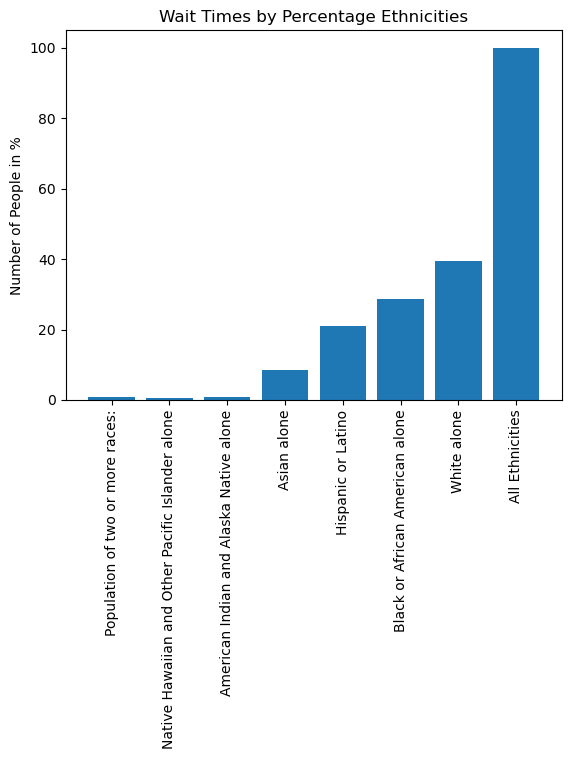

<Figure size 2000x400 with 0 Axes>

In [404]:

plt.bar(x_calc, y)
#plt.xlabel('Ethnicities')
plt.ylabel('Number of People in %')
plt.title('Wait Times by Percentage Ethnicities')
plt.xticks(rotation="vertical")
plt.figure(figsize=(20,4))


plt.show

In [339]:
plt.savefig('images/wait_times_ethnicities.png')

<Figure size 640x480 with 0 Axes>

In [298]:
df_e = pd.read_csv('output/census_eth_df_percent.csv')

In [354]:
census_eth_df_percent = pd.DataFrame(df_e)
census_eth_df_percent.head()

,Unnamed: 0,Ethnicities,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Puerto Rico
0,1,Hispanic or Latino,18.73,5.26,6.79,30.65,8.53,39.40,21.88,17.29,...,4.37,6.93,39.26,15.07,2.41,10.53,13.75,1.94,7.59,98.88
1,4,White alone,57.84,63.12,57.51,53.37,68.52,34.69,65.13,63.21,...,79.58,70.91,39.75,75.36,89.13,58.60,63.84,89.14,78.63,0.75
2,5,Black or African American alone,12.05,25.64,2.83,4.43,14.94,5.36,3.83,10.01,...,1.97,15.68,11.82,1.14,1.34,18.28,3.84,3.61,6.22,0.13
3,6,American Indian and Alaska Native alone,0.68,0.46,14.84,3.69,0.68,0.39,0.58,0.18,...,8.41,0.22,0.29,0.88,0.31,0.22,1.18,0.18,0.82,0.01
4,7,Asian alone,5.92,1.51,5.92,3.48,1.70,15.12,3.38,4.73,...,1.50,1.94,5.36,2.40,1.78,7.07,9.38,0.83,2.96,0.08


In [355]:
census_eth_df_percent.drop('Unnamed: 0', axis=1, inplace=True)
census_eth_df_percent.columns

Index(['Ethnicities', 'United States', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Puerto Rico'],
      dtype='object')

In [356]:
census_eth_df_percent = census_eth_df_percent.rename(columns={'United States': 'United_States', 'New Hampshire': 'New_Hampshire', 'New Jersey': 'New_Jersey',
                                                   'New Mexico': 'New_Mexico', 'New York': 'New_York',
                                                   'North Carolina': 'North_Carolina', 'North Dakota': 'North_Dakota',
                                                   'Rhode Island': 'Rhode_Island', 'South Carolina': 'South_Carolina',
                                                   'South Dakota': 'South_Dakota', 'West Virginia': 'West_Virginia'})

In [359]:
#create a loop to get all the state percentages by ethnicity
for c in range(1, 53):
    col = census_eth_df_percent.columns[c]
    print(col)
    #dataframe name below
    df_name_string = f'{col}_ethn' 
    print(df_name_string)
    #add in the columns I want to get
    df_name = pd.DataFrame(census_eth_df_percent[[col, 'Ethnicities']])
    #rename the dataframe to reflect the state
    globals()[df_name_string] = pd.DataFrame(df_name)
    df_name.head()

United_States
United_States_ethn
Alabama
Alabama_ethn
Alaska
Alaska_ethn
Arizona
Arizona_ethn
Arkansas
Arkansas_ethn
California
California_ethn
Colorado
Colorado_ethn
Connecticut
Connecticut_ethn
Delaware
Delaware_ethn
District of Columbia
District of Columbia_ethn
Florida
Florida_ethn
Georgia
Georgia_ethn
Hawaii
Hawaii_ethn
Idaho
Idaho_ethn
Illinois
Illinois_ethn
Indiana
Indiana_ethn
Iowa
Iowa_ethn
Kansas
Kansas_ethn
Kentucky
Kentucky_ethn
Louisiana
Louisiana_ethn
Maine
Maine_ethn
Maryland
Maryland_ethn
Massachusetts
Massachusetts_ethn
Michigan
Michigan_ethn
Minnesota
Minnesota_ethn
Mississippi
Mississippi_ethn
Missouri
Missouri_ethn
Montana
Montana_ethn
Nebraska
Nebraska_ethn
Nevada
Nevada_ethn
New_Hampshire
New_Hampshire_ethn
New_Jersey
New_Jersey_ethn
New_Mexico
New_Mexico_ethn
New_York
New_York_ethn
North_Carolina
North_Carolina_ethn
North_Dakota
North_Dakota_ethn
Ohio
Ohio_ethn
Oklahoma
Oklahoma_ethn
Oregon
Oregon_ethn
Pennsylvania
Pennsylvania_ethn
Rhode_Island
Rhode_Island_ethn

In [363]:
California_ethn.head()

,California,Ethnicities
0,39.40,Hispanic or Latino
1,34.69,White alone
2,5.36,Black or African American alone
3,0.39,American Indian and Alaska Native alone
4,15.12,Asian alone


In [364]:
California_ethn.to_csv('output/california_ethn.csv')

In [366]:
import sqlite3
from sqlite3 import Error
from pathlib import Path
#create a database connection
conn = sqlite3.connect('optn_census.db')
c = conn.cursor()

In [367]:
United_States_ethn.to_sql('United_States_ethn', conn, if_exists='replace', index=False)
Alabama_ethn.to_sql('Alabama_ethn', conn, if_exists='replace', index=False)
Alaska_ethn.to_sql('Alaska_ethn', conn, if_exists='replace', index=False)
Arizona_ethn.to_sql('Arizona_ethn', conn, if_exists='replace', index=False)
Arkansas_ethn.to_sql('Arkansas_ethn', conn, if_exists='replace', index=False)
California_ethn.to_sql('California_ethn', conn, if_exists='replace', index=False)
Colorado_ethn.to_sql('Colorado_ethn', conn, if_exists='replace', index=False)
Connecticut_ethn.to_sql('Connecticut_ethn', conn, if_exists='replace', index=False)
Delaware_ethn.to_sql('Delaware_ethn', conn, if_exists='replace', index=False)
Florida_ethn.to_sql('Florida_ethn', conn, if_exists='replace', index=False)
Georgia_ethn.to_sql('Georgia_ethn', conn, if_exists='replace', index=False)
Hawaii_ethn.to_sql('Hawaii_ethn', conn, if_exists='replace', index=False)
Idaho_ethn.to_sql('Idaho_ethn', conn, if_exists='replace', index=False)
Illinois_ethn.to_sql('Illinois_ethn', conn, if_exists='replace', index=False)
Indiana_ethn.to_sql('Indiana_ethn', conn, if_exists='replace', index=False)
Iowa_ethn.to_sql('Iowa_ethn', conn, if_exists='replace', index=False)
Kansas_ethn.to_sql('Kansas_ethn', conn, if_exists='replace', index=False)
Kentucky_ethn.to_sql('Kentucky_ethn', conn, if_exists='replace', index=False)
Louisiana_ethn.to_sql('Louisiana_ethn', conn, if_exists='replace', index=False)
Maine_ethn.to_sql('Maine_ethn', conn, if_exists='replace', index=False)
Maryland_ethn.to_sql('Maryland_ethn', conn, if_exists='replace', index=False)
Massachusetts_ethn.to_sql('Massachusetts_ethn', conn, if_exists='replace', index=False)
Michigan_ethn.to_sql('Michigan_ethn', conn, if_exists='replace', index=False)
Minnesota_ethn.to_sql('Minnesota_ethn', conn, if_exists='replace', index=False)
Mississippi_ethn.to_sql('Mississippi_ethn', conn, if_exists='replace', index=False)
Missouri_ethn.to_sql('Missouri_ethn', conn, if_exists='replace', index=False)
Montana_ethn.to_sql('Montana_ethn', conn, if_exists='replace', index=False)
Nebraska_ethn.to_sql('Nebraska_ethn', conn, if_exists='replace', index=False)
Nevada_ethn.to_sql('Nevada_ethn', conn, if_exists='replace', index=False)
New_Hampshire_ethn.to_sql('New_Hampshire_ethn', conn, if_exists='replace', index=False)
New_Jersey_ethn.to_sql('New_Jersey_ethn', conn, if_exists='replace', index=False)
New_Mexico_ethn.to_sql('New_Mexico_ethn', conn, if_exists='replace', index=False)
New_York_ethn.to_sql('New_York_ethn', conn, if_exists='replace', index=False)
North_Carolina_ethn.to_sql('North_Carolina_ethn', conn, if_exists='replace', index=False)
North_Dakota_ethn.to_sql('North_Dakota_ethn', conn, if_exists='replace', index=False)
Ohio_ethn.to_sql('Ohio_ethn', conn, if_exists='replace', index=False)
Oklahoma_ethn.to_sql('Oklahoma_ethn', conn, if_exists='replace', index=False)
Oregon_ethn.to_sql('Oregon_ethn', conn, if_exists='replace', index=False)
Pennsylvania_ethn.to_sql('Pennsylvania_ethn', conn, if_exists='replace', index=False)
Rhode_Island_ethn.to_sql('Rhode_Island_ethn', conn, if_exists='replace', index=False)
South_Carolina_ethn.to_sql('South_Carolina_ethn', conn, if_exists='replace', index=False)
South_Dakota_ethn.to_sql('South_Dakota_ethn', conn, if_exists='replace', index=False)
Tennessee_ethn.to_sql('Tennessee_ethn', conn, if_exists='replace', index=False)
Texas_ethn.to_sql('Texas_ethn', conn, if_exists='replace', index=False)
Utah_ethn.to_sql('Utah_ethn', conn, if_exists='replace', index=False)
Vermont_ethn.to_sql('Vermont_ethn', conn, if_exists='replace', index=False)
Virginia_ethn.to_sql('Virginia_ethn', conn, if_exists='replace', index=False)
Washington_ethn.to_sql('Washington_ethn', conn, if_exists='replace', index=False)
West_Virginia_ethn.to_sql('West_Virginia_ethn', conn, if_exists='replace', index=False)
Wisconsin_ethn.to_sql('Wisconsin_ethn', conn, if_exists='replace', index=False)

In [368]:
data = c.execute("SELECT * FROM West_Virginia_ethn")

for record in data:
    print(record)

(1.94, 'Hispanic or Latino')
(89.14, 'White alone')
(3.61, 'Black or African American alone')
(0.18, 'American Indian and Alaska Native alone')
(0.83, 'Asian alone')
(0.02, 'Native Hawaiian and Other Pacific Islander alone')
(0.26, 'Some Other Race alone')
(4.02, 'Population of two or more races:')


In [369]:
conn.commit()
conn.close()

In [313]:
df_e.head(9)

,Unnamed: 0,Ethnicities,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Puerto Rico
0,1,Hispanic or Latino,18.73,5.26,6.79,30.65,8.53,39.40,21.88,17.29,...,4.37,6.93,39.26,15.07,2.41,10.53,13.75,1.94,7.59,98.88
1,4,White alone,57.84,63.12,57.51,53.37,68.52,34.69,65.13,63.21,...,79.58,70.91,39.75,75.36,89.13,58.60,63.84,89.14,78.63,0.75
2,5,Black or African American alone,12.05,25.64,2.83,4.43,14.94,5.36,3.83,10.01,...,1.97,15.68,11.82,1.14,1.34,18.28,3.84,3.61,6.22,0.13
3,6,American Indian and Alaska Native alone,0.68,0.46,14.84,3.69,0.68,0.39,0.58,0.18,...,8.41,0.22,0.29,0.88,0.31,0.22,1.18,0.18,0.82,0.01
4,7,Asian alone,5.92,1.51,5.92,3.48,1.70,15.12,3.38,4.73,...,1.50,1.94,5.36,2.40,1.78,7.07,9.38,0.83,2.96,0.08
5,8,Native Hawaiian and Other Pacific Islander alone,0.19,0.05,1.70,0.20,0.47,0.35,0.16,0.03,...,0.06,0.05,0.10,1.10,0.03,0.07,0.81,0.02,0.03,0.00
6,9,Some Other Race alone,0.51,0.29,0.62,0.44,0.27,0.57,0.51,0.75,...,0.23,0.35,0.39,0.38,0.40,0.53,0.56,0.26,0.30,0.08
7,10,Population of two or more races:,4.09,3.67,9.78,3.73,4.89,4.12,4.52,3.82,...,3.88,3.91,3.04,3.68,4.59,4.69,6.63,4.02,3.46,0.07


In [317]:
x_new_list = (df_e['Ethnicities'].head(8)).tolist()
my_neworder = [6, 7, 5, 3, 4, 2, 0, 1]
x_new = [x_new_list[j] for j in my_neworder]
print(x_new)

['Some Other Race alone', 'Population of two or more races:', 'Native Hawaiian and Other Pacific Islander alone', 'American Indian and Alaska Native alone', 'Asian alone', 'Black or African American alone', 'Hispanic or Latino', 'White alone']


In [319]:
y_new_list = (df_e['United States'].head(8)).tolist()
y_new = [y_new_list[k] for k in my_neworder]
print(y_new)

[0.51, 4.09, 0.19, 0.68, 5.92, 12.05, 18.73, 57.84]


<function matplotlib.pyplot.show(close=None, block=None)>

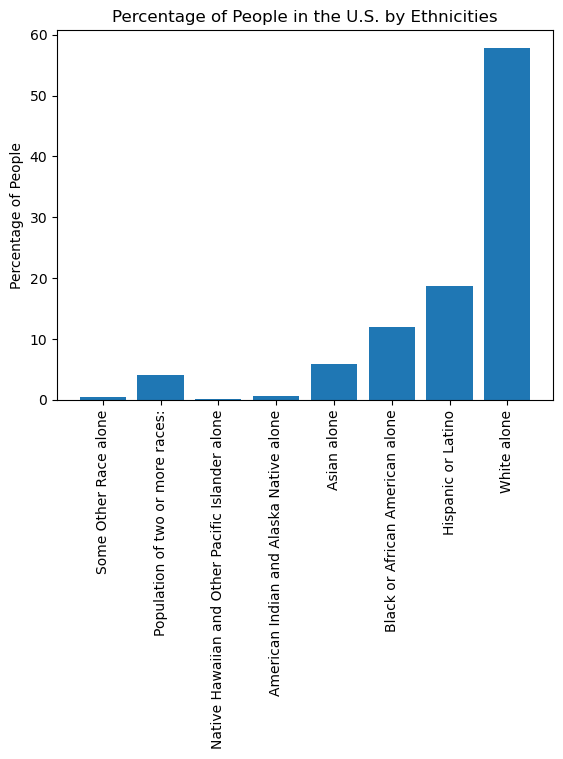

<Figure size 2000x400 with 0 Axes>

In [405]:
plt.bar(x_new, y_new)
#plt.xlabel('Ethnicities')
plt.ylabel('Percentage of People')
plt.title('Percentage of People in the U.S. by Ethnicities')
plt.xticks(rotation="vertical")
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,4))


plt.show